In [20]:
import os
import numpy as np
import nibabel as nib
from PIL import Image

def save_mask_images(nifti_file, output_folder):
    # Load NIfTI file
    img = nib.load(nifti_file)
    data = img.get_fdata()

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Iterate over each slice in the NIfTI data
    for slice_idx in range(data.shape[2]):
        # Extract the slice
        slice_data = data[:, :, slice_idx]

        # Threshold the slice to create the mask image
        mask = (slice_data > 0).astype(np.uint8) * 255

        # Create a PIL Image from the mask array
        mask_image = Image.fromarray(mask)

        # Save the mask image as JPEG
        output_path = os.path.join(output_folder, f"mask_{slice_idx}.jpg")
        mask_image.save(output_path)

# Example usage
nifti_file_path = '075.nii'
output_folder_path = 'masks'
save_mask_images(nifti_file_path, output_folder_path)


In [21]:
import nibabel as nib
import numpy as np

def estimate_hemorrhage_volume(nifti_file):
    # Load NIfTI file
    img = nib.load(nifti_file)
    data = img.get_fdata()
    print(img.header)

    # Threshold the image to extract hemorrhage region
    hemorrhage_mask = np.where(data > 0, 1, 0)
    sx, sy, sz = img.header.get_zooms()
    print(sx*sy*sz) # volume

    # Calculate voxel size
    voxel_size = np.prod(img.header.get_zooms())
    
    print(voxel_size)
    
    
    print(hemorrhage_mask)
    print(np.sum(hemorrhage_mask))

    # Calculate hemorrhage volume in cubic millimeters
    hemorrhage_volume = np.sum(hemorrhage_mask) * voxel_size

    return hemorrhage_volume

# Example usage
nifti_file_path = '075.nii'
volume = estimate_hemorrhage_volume(nifti_file_path)
print(f"Hemorrhage volume: {volume} mm^3")
print(f"Hemorrhage volume: {volume/1000} cm^3")

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 48
dim             : [  3 512 512  36   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.        0.390625  0.390625  5.        0.        0.        0.
  0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 2588
glmin           : -1024
descrip         : b'time=--------------.---;'
aux_file        : b';SIEMENS;Head_SAFIRE'
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.0
quatern_c       : 1.0
quatern_d       : -0.0
qoffset_x    

In [26]:
import os
from PIL import Image

def calculate_hemorrhage_pixel_count(folder_path):
    total_count = 0

    # Iterate over each file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            file_path = os.path.join(folder_path, filename)
            image = Image.open(file_path)

            # Convert the image to grayscale
            image = image.convert("L")

            # Convert the image to a numpy array
            mask_array = np.array(image)

            # Count the pixels corresponding to hemorrhage area
            hemorrhage_pixels = np.count_nonzero(mask_array)

            # Accumulate the count
            total_count += hemorrhage_pixels

    return total_count

# Example usage
folder_path = 'masks'
hemorrhage_pixel_count = calculate_hemorrhage_pixel_count(folder_path)
print(f"Count of pixels in hemorrhage area: {hemorrhage_pixel_count}")

voxel_size = 0.76293945

hemorrhage_volume = hemorrhage_pixel_count * voxel_size
print(hemorrhage_volume/1000)


Count of pixels in hemorrhage area: 109176
83.29467739319999


In [3]:
import nibabel as nib

def estimate_hemorrhage_volume(nifti_file):
    # Load NIfTI file
    img = nib.load(nifti_file)
    data = img.get_fdata()

    # Get voxel dimensions
    voxel_dims = img.header.get_zooms()

    # Calculate voxel volume in cubic millimeters
    voxel_volume = voxel_dims[0] * voxel_dims[1] * voxel_dims[2]

    # Threshold the image to extract hemorrhage region
    hemorrhage_mask = data > 0

    # Calculate hemorrhage volume in cubic millimeters
    hemorrhage_volume = np.sum(hemorrhage_mask) * voxel_volume

    return hemorrhage_volume

# Example usage
nifti_file_path = '075.nii'
volume = estimate_hemorrhage_volume(nifti_file_path)
print(f"Hemorrhage volume: {volume} mm^3")


Hemorrhage volume: 74063.1103515625 mm^3


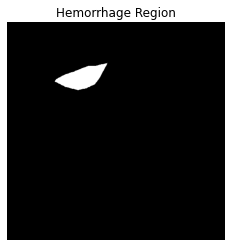

Hemorrhage volume: 74063.1103515625 mm^3


In [4]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def estimate_hemorrhage_volume(nifti_file):
    # Load NIfTI file
    img = nib.load(nifti_file)
    data = img.get_fdata()

    # Get voxel dimensions
    voxel_dims = img.header.get_zooms()

    # Calculate voxel volume in cubic millimeters
    voxel_volume = voxel_dims[0] * voxel_dims[1] * voxel_dims[2]

    # Threshold the image to extract hemorrhage region
    hemorrhage_mask = data > 0

    # Calculate hemorrhage volume in cubic millimeters
    hemorrhage_volume = np.sum(hemorrhage_mask) * voxel_volume

    # Visualize the hemorrhage region
    plt.figure()
    plt.imshow(hemorrhage_mask[:, :, data.shape[2] // 2], cmap='gray')
    plt.title('Hemorrhage Region')
    plt.axis('off')
    plt.show()

    return hemorrhage_volume

# Example usage
nifti_file_path = '075.nii'
volume = estimate_hemorrhage_volume(nifti_file_path)
print(f"Hemorrhage volume: {volume} mm^3")
